In [1]:
import os
import torch
import copy
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib import cm

DATE = '2020-07-30_EnvAlt_val'
EXP = 'evaluation_run1'
LOAD_DIR = Path('../saved_data') / DATE / EXP

plots = []
fig_count = 0

# load data of all samples
states, support_calc, configs, actions, rewards = dict(), dict(), dict(), dict(), dict()
for sample in next(os.walk(LOAD_DIR))[1]:
    states.update({sample: torch.load(LOAD_DIR / sample / 'batch_states')})
    support_calc.update({sample: torch.load(LOAD_DIR / sample / 'support_calc')})
    configs.update({sample: torch.load(LOAD_DIR / sample / 'config')})
    actions.update({sample: torch.load(LOAD_DIR / sample / 'batch_actions')})
    rewards.update({sample: torch.load(LOAD_DIR / sample / 'rewards')})

# ax[0].elev --> 30 default, azim = -60 

In [5]:
configs[sample]['beta_j']['Shell']

0.016

<h2><center>plots for support of Gov and Shell - beta</center></h2>


<IPython.core.display.Javascript object>


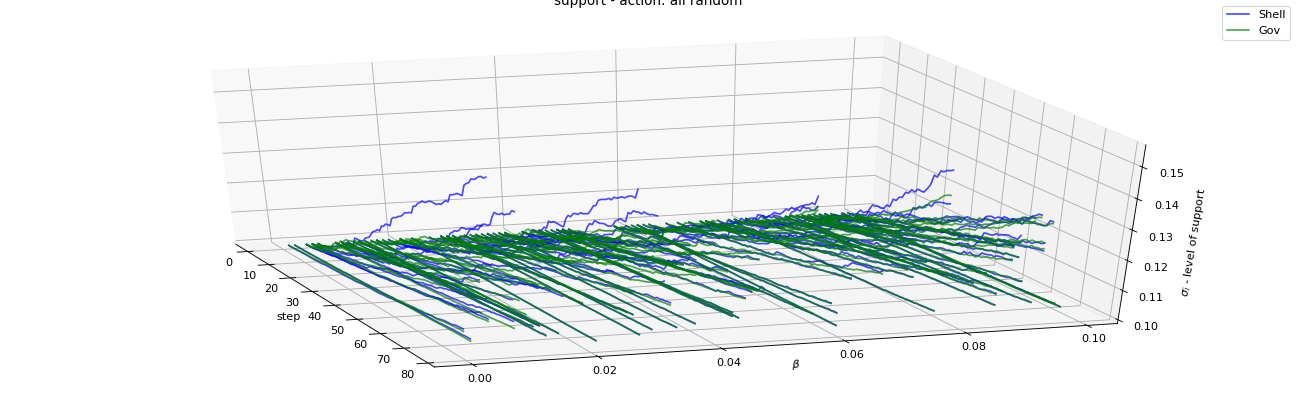

In [2]:
%matplotlib inline
%matplotlib notebook
fig = plt.figure(fig_count, figsize=(16, 5))
plots.append(fig)
fig_count += 1

# create and set fig properties
c = ['b', 'g']
ax = fig.add_subplot(111, projection='3d')
fig.tight_layout()

for i, key in enumerate(['Shell', 'Gov']):
    flag = True
    for sample in next(os.walk(LOAD_DIR))[1]:
        x = range(0, states[sample][key].shape[1])
        mean = states[sample][key].mean(axis=0)[:, 0]
        if flag:
            ax.plot(x, mean, configs[sample]['beta_j'][key], zdir='y', c=c[i], label=key, alpha=0.7)
            flag = False
        ax.plot(x, mean, configs[sample]['beta_j'][key], zdir='y', c=c[i], alpha=0.7)
        ax.set_title('support - action: all random')
        ax.set_xlabel('step')
        ax.set_ylabel(r'$\beta$')
        ax.set_zlabel(r'$\sigma_i$' + ' - level of support')
        ax.view_init(elev=30,azim=-10)
fig.legend()
# fig.tight_layout()
fig.show()

<h2><center>plots for reward</center></h2>

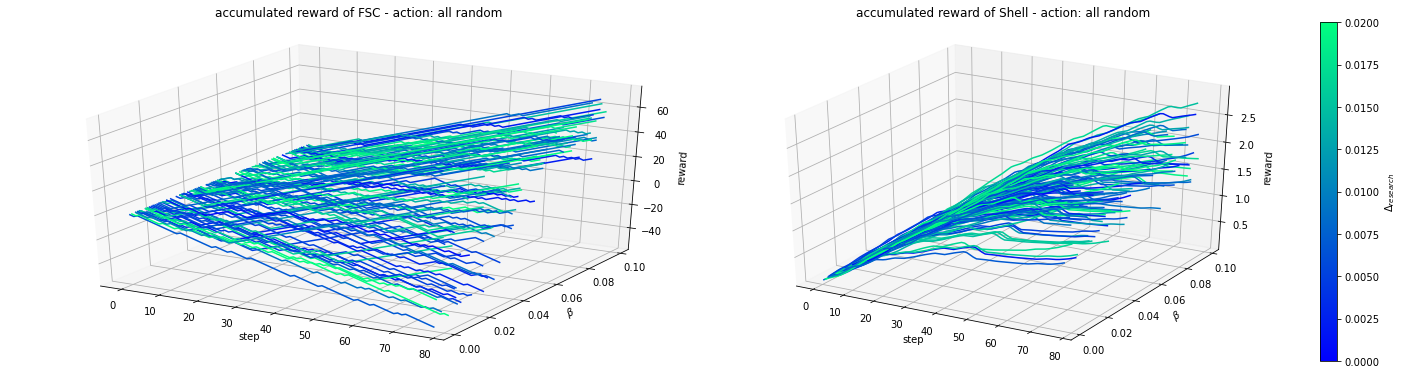

In [15]:
%matplotlib inline
# %matplotlib notebook
fig = plt.figure(fig_count, figsize=(20, 5))
plots.append(fig)
fig_count += 1

cmap = cm.get_cmap('winter')
vmax = np.array([configs[sample]['delta_resource'] for sample in next(os.walk(LOAD_DIR))[1]]).max()
mappable = cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize(vmin=0, vmax=vmax))
ax = [fig.add_subplot(121, projection='3d'), fig.add_subplot(122, projection='3d')]
fig.tight_layout()
fig.colorbar(mappable, label=r'$\Delta_{research}$')

for i, key in enumerate(['FSC', 'Shell']):
    for s, sample in enumerate(next(os.walk(LOAD_DIR))[1]):
        x = range(0, rewards[sample][key].shape[1])
        mean = rewards[sample][key][0, :, 0].cumsum() #.mean(axis=0)[:, 0].cumsum()#
        val = configs[sample]['delta_resource']/vmax
        if configs[sample]['beta_j']['Shell'] <=1:
            ax[i].plot(x, mean, configs[sample]['beta_j']['Shell'], zdir='y', c=(cmap(val)[0], cmap(val)[1], cmap(val)[2]))
        ax[i].set_title('accumulated reward of ' + key + ' - action: all random')
        ax[i].set_xlabel('step')
        ax[i].set_ylabel(r'$\beta$')
        ax[i].set_zlabel('reward')
#         ax[i].view_init(elev=30,azim=-10)
# fig.show()

<h2><center>plots for support calculation</center></h2>

In [ ]:
%matplotlib inline
# %matplotlib notebook

par_agt = {'Shell': ['Gov', 'FSC'], 'Gov': ['Shell', 'FSC']}
c = ['b', 'g']
# create figure and axis
fig = plt.figure(fig_count, figsize=(25, 20))    
plots.append(fig)  
fig_count += 1
ax = [fig.add_subplot(421), fig.add_subplot(422),
      fig.add_subplot(423), fig.add_subplot(424),
      fig.add_subplot(425), fig.add_subplot(426)]#,
#       fig.add_subplot(427), fig.add_subplot(428)]

sample = 'sample_no0'
for i, key in enumerate(support_calc[sample].keys()):
    x = range(0, support_calc[sample][key].shape[1])
    mean = support_calc[sample][key][0]#.mean(axis=0)[:, :]     
    ax[i].plot(x, mean[:,1], label= par_agt[key][0] + ' (partner)')
    ax[i].plot(x, mean[:,2], label= par_agt[key][1] + ' (partner)')
    ax[i].legend()
    ax[i].set_title(key + ' - shares of support equation') 

for i, key in enumerate(support_calc[sample].keys()):
    x = range(0, support_calc[sample][key].shape[1])
    mean = support_calc[sample][key][0]#.mean(axis=0)[:, :]     
    ax[i+2].plot(x, mean[:,3]-mean[:,0])#, label= 'prev support')
#     ax[i+2].plot(x, mean[:,3], label= 'new support')
#     ax[i+2].legend()
    ax[i+2].set_title(key + ' - delta support') 
ax[4].scatter(x, actions[sample]['FSC']['All'][:78])
ax[4].set_title('actions FSC: 0 = research, 1 = higher impact on Shell')
mean_shell = support_calc[sample]['Shell'].mean(axis=0)[:, :]
mean_gov = support_calc[sample]['Gov'].mean(axis=0)[:, :]
ax[5].plot(x, mean_shell[:,3]-mean_shell[:,0] + mean_gov[:,3]-mean_gov[:,0])
ax[5].set_title('difference of total support')
ax[5].set_ylim(ymin=0, ymax=10**-7)
# ax[6].plot(x, states[sample]['Shell'][0][:,1])
# ax[6].set_title('resource allocation Shell to FSC')
# ax[7].plot(x, states[sample]['Gov'][0][:,1])
# ax[7].set_title('resource allocation Gov to FSC')
for axis in ax:
    axis.xaxis.grid(True, which='minor', linewidth=1)
    axis.xaxis.grid(True, which='major', linewidth=2)
    axis.minorticks_on()

In [ ]:
mean_shell[:,3]-mean_shell[:,0] + mean_gov[:,3]-mean_gov[:,0]

<h2><center>plots for beta - sub_lvl dependency</center></h2>

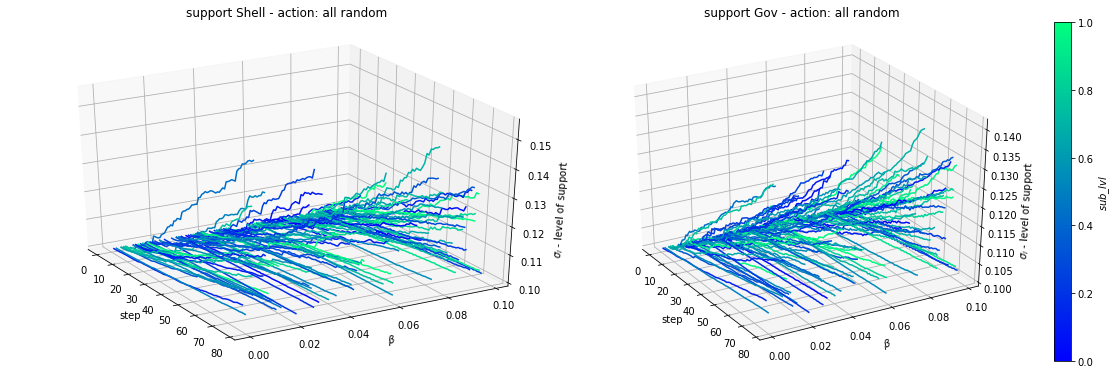

In [10]:
%matplotlib inline
# %matplotlib notebook
fig = plt.figure(fig_count, figsize=(16, 5))
plots.append(fig)
fig_count += 1

# create and set fig properties
cmap = cm.get_cmap('winter')
mappable = cm.ScalarMappable(cmap=cmap)
ax = [fig.add_subplot(121, projection='3d'), fig.add_subplot(122, projection='3d')]
fig.tight_layout()
fig.colorbar(mappable, label=r'$sub\_lvl$')

for i, key in enumerate(['Shell', 'Gov']):
    for sample in next(os.walk(LOAD_DIR))[1]:
        x = range(0, states[sample][key].shape[1])
        mean = states[sample][key].mean(axis=0)[:, 0]
        std  = states[sample][key].std(axis=0)[:, 0]
        val = configs[sample]['sub_lvl']*10
        ax[i].plot(x, mean, configs[sample]['beta_j'][key], zdir='y',
                   c=(cmap(val)[0], cmap(val)[1], cmap(val)[2]))
        ax[i].set_title('support ' + key + ' - action: all random')
        ax[i].set_xlabel('step')
        ax[i].set_ylabel(r'$\beta$')
        ax[i].set_zlabel(r'$\sigma_i$' + ' - level of support')
        ax[i].view_init(elev=30,azim=-30)
# fig.tight_layout()
# fig.show()

<h2><center>plots for beta - delta_research dependency</center></h2>

In [ ]:
%matplotlib inline
# %matplotlib notebook
fig = plt.figure(fig_count, figsize=(16, 5))
plots.append(fig)
fig_count += 1

# create and set fig properties
cmap = cm.get_cmap('winter')
mappable = cm.ScalarMappable(cmap=cmap)
ax = [fig.add_subplot(121, projection='3d'), fig.add_subplot(122, projection='3d')]
fig.tight_layout()
fig.colorbar(mappable, label=r'$\Delta_{research}$')

for i, key in enumerate(['Shell', 'Gov']):
    for sample in next(os.walk(LOAD_DIR))[1]:
        x = range(0, states[sample][key].shape[1])
        mean = states[sample][key].mean(axis=0)[:, 0]
        std  = states[sample][key].std(axis=0)[:, 0]
        val = configs[sample]['delta_research']*10
        if configs[sample]['beta_j'][key] >= 0:
            ax[i].plot(x, mean, configs[sample]['beta_j'][key], zdir='y', c=(cmap(val)[0], cmap(val)[1], cmap(val)[2]))
        ax[i].set_title('support ' + key + ' - action: all random')
        ax[i].set_xlabel('step')
        ax[i].set_ylabel(r'$\beta$')
        ax[i].set_zlabel(r'$\sigma_i$' + ' - level of support')
        ax[i].view_init(elev=20,azim=-20)
# fig.tight_layout()
# fig.show()

<h2><center>plots for beta - delta_resource dependency</center></h2>


In [ ]:
%matplotlib inline
# %matplotlib notebook
fig = plt.figure(fig_count, figsize=(16, 5))
plots.append(fig)
fig_count += 1

# create and set fig properties
cmap = cm.get_cmap('winter')
mappable = cm.ScalarMappable(cmap=cmap)
ax = [fig.add_subplot(121, projection='3d'), fig.add_subplot(122, projection='3d')]
fig.tight_layout()
fig.colorbar(mappable, label=r'$\Delta_{\rho}$')

for i, key in enumerate(['Shell', 'Gov']):
    for sample in next(os.walk(LOAD_DIR))[1]:
        x = range(0, states[sample][key].shape[1])
        mean = states[sample][key].mean(axis=0)[:, 0]
        val = configs[sample]['delta_resource']*50
        ax[i].plot(x, mean, configs[sample]['beta_j']['FSC'], zdir='y', c=((cmap(val)[0], cmap(val)[1], cmap(val)[2])))
        ax[i].set_title('support ' + key + ' - action: all random')
        ax[i].set_xlabel('step')
        ax[i].set_ylabel(r'$\beta$')
        ax[i].set_zlabel('level of support')
        ax[i].view_init(elev=20,azim=-10)
# fig.show()

<h2><center>plots for distribution of parameters</center></h2>

In [ ]:
%matplotlib inline

import seaborn as sns
import copy

fig = plt.figure(fig_count, figsize=(18, 4))
plots.append(fig)
fig_count += 1
ax = [fig.add_subplot(141), fig.add_subplot(142), fig.add_subplot(143), fig.add_subplot(144)]
labels = [r'$\Delta_{\rho}$', r'$\beta$', r'$sub\_lvl$', r'$\Delta_\rho$']
params = [[configs[sample]['delta_resource'] for sample in next(os.walk(LOAD_DIR))[1]],
          [configs[sample]['beta_j']['Shell'] for sample in next(os.walk(LOAD_DIR))[1]],
          [configs[sample]['sub_lvl'] for sample in next(os.walk(LOAD_DIR))[1]],
          [configs[sample]['delta_research'] for sample in next(os.walk(LOAD_DIR))[1]]]

for i in range(0, len(labels)):
    sns.distplot(params[i], bins=10, ax=ax[i], rug=True)
    ax[i].set_xlabel(labels[i])
fig.suptitle('kernel density estimation and histogram for {} samples'.format(len(params[2])) + action);

<h2><center>plots for action distribution (only for random action)</center></h2>

In [ ]:
# TODO: könnte auch ein 3D plot mit der distribution der action und abhängigkeit der beiden anderen Parameter sein

%matplotlib inline
# %matplotlib notebook
fig = plt.figure(fig_count, figsize=(12, 4))
plots.append(fig)
fig_count += 1

cmap = cm.get_cmap('winter')
mappable = cm.ScalarMappable(cmap=cmap)
ax = [fig.add_subplot(131), fig.add_subplot(132), fig.add_subplot(133)]
# fig.tight_layout()
fig.colorbar(mappable, label='final support level')

i = -1
for key in actions['sample_no0'].keys():
    for par_agt in actions['sample_no0'][key].keys():
        i += 1
        x = []
        y = []
        val = []
        for sample in next(os.walk(LOAD_DIR))[1]:
            # first state entry of FSC is the support level of Shell and Gov added together
            val.append(states[sample]['FSC'][:,states[sample]['FSC'].shape[1]-1,0].mean() * 10) 
            x.append(configs[sample]['beta_j'][key])
            y.append(np.array(actions[sample][key][par_agt]).mean())
        ax[i].scatter(np.array(x), np.array(y), c=np.array(val), cmap=cmap)
        ax[i].set_xlabel(r'$\beta$')
        ax[i].set_ylabel('mean action')
        ax[i].set_title('action from ' + key + ' to ' + par_agt)
fig.tight_layout()

In [ ]:
plots[0].savefig((LOAD_DIR / (DATE + '_' + EXP + '_support_both_beta' + '.pdf')), bbox_inches="tight")
plots[1].savefig((LOAD_DIR / (DATE + '_' + EXP + '_beta_sub_lvl' + '.pdf')), bbox_inches="tight")
plots[2].savefig((LOAD_DIR / (DATE + '_' + EXP + '_beta_delta_research' + '.pdf')), bbox_inches="tight")
plots[3].savefig((LOAD_DIR / (DATE + '_' + EXP + '_beta_delta_resource' + '.pdf')), bbox_inches="tight")
plots[4].savefig((LOAD_DIR / (DATE + '_' + EXP + '_parameter_dist' + '.pdf')), bbox_inches="tight")
# plots[0].savefig((LOAD_DIR / (DATE + '_' + EXP + '_action_mean' + '.pdf')), bbox_inches="tight")

In [ ]:
plots

In [ ]:
states[sample]['FSC'].shape[1]-1

